In [154]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2
from PIL import Image
from baseline import MultiMethod

import torch
from ur import Ur

In [155]:
# data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
# datas = glob.glob(os.path.join(data_path, '*.npy'))
# randomidx = np.random.permutation(len(datas))
# datas = [datas[i] for i in randomidx]

data_path_multimodel = '/home/panding/code/UR/piv-data/baseline-multimodel'
data_path_multitransform = '/home/panding/code/UR/piv-data/baseline-multitransform'
data_path_ur = '/home/panding/code/UR/piv-data/test'
data_path_truth = '/home/panding/code/UR/piv-data/truth'

datas_multimodel = glob.glob(os.path.join(data_path_multimodel, '*.npy'))
datas_multitransform = glob.glob(os.path.join(data_path_multitransform, '*.npy'))
datas_ur = glob.glob(os.path.join(data_path_ur, '*.npy'))
datas_truth = glob.glob(os.path.join(data_path_truth, '*.npy'))

datas_multimodel = sorted(datas_multimodel)
datas_multitransform = sorted(datas_multitransform)
datas_ur = sorted(datas_ur)
datas_truth = sorted(datas_truth)

randomidx = np.random.permutation(len(datas_multimodel))
datas_multimodel = [datas_multimodel[i] for i in randomidx]
datas_multitransform = [datas_multitransform[i] for i in randomidx]
datas_ur = [datas_ur[i] for i in randomidx]
datas_truth = [datas_truth[i] for i in randomidx]

In [156]:
baseline_1 = MultiMethod(datas_multimodel[0], 0)
print(datas_multimodel[0])
# baseline_1.show()
# sigma_u, sigma_v = baseline_1.std(show=1)
# sigma_u_t, sigma_v_t = baseline_1.std_truth(show=1)
uncertainty_u_mm, uncertainty_v_mm = baseline_1.uncertainty(show=0)

/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_channel_hd_00583.npy


In [157]:
baseline_2 = MultiMethod(datas_multitransform[0], 1)
print(datas_multitransform[0])
# baseline_2.show()
# sigma_u, sigma_v = baseline_2.std(show=1)
# sigma_u_t, sigma_v_t = baseline_2.std_truth(show=1)
uncertainty_u_mt, uncertainty_v_mt = baseline_2.uncertainty(show=0)

detransform has competed
/home/panding/code/UR/piv-data/baseline-multitransform/JHTDB_channel_hd_00583.npy


In [158]:
model_path = '/home/panding/code/UR/ur-model/model-110.model.pt'
my_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data = np.load(datas_ur[0])
data = data[:4]

uncertainty = Ur(data, path=model_path, device=my_device)
sigma_u_ur, sigma_v_ur = uncertainty.get_sigma()

completed!


In [159]:
def show():
    plt.figure(figsize=(12,8))
            
    plt.subplot(2, 3, 1)
    plt.title('mm_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 4)
    plt.title('mm_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mm)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 2)
    plt.title('mt_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_u_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 5)
    plt.title('mt_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(uncertainty_v_mt)
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 3)
    plt.title('mue_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_u_ur.transpose(1, 2, 0)))
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 3, 6)
    plt.title('mue_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(sigma_v_ur.transpose(1, 2, 0)))
    plt.colorbar(fraction=0.05)

    plt.show()

In [160]:
def show_truth():
    
    truth = np.load(datas_truth[0])
    
    plt.figure(figsize=(12,6))
            
    plt.subplot(2, 5, 1)
    plt.title('flow_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[0])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 6)
    plt.title('flow_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[1])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 2)
    plt.title('flow_u_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[2])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 7)
    plt.title('flow_v_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[3])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 3)
    plt.title('loss_u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[4])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 8)
    plt.title('loss_v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[5])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 4)
    plt.title('metrics_epe')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[6])
    plt.colorbar(fraction=0.05)

    plt.subplot(2, 5, 9)
    plt.title('metrics_1')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[7])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 5)
    plt.title('metrics_3')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[8])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(2, 5, 10)
    plt.title('metrics_5')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(truth[9])
    plt.colorbar(fraction=0.05)

    plt.show()

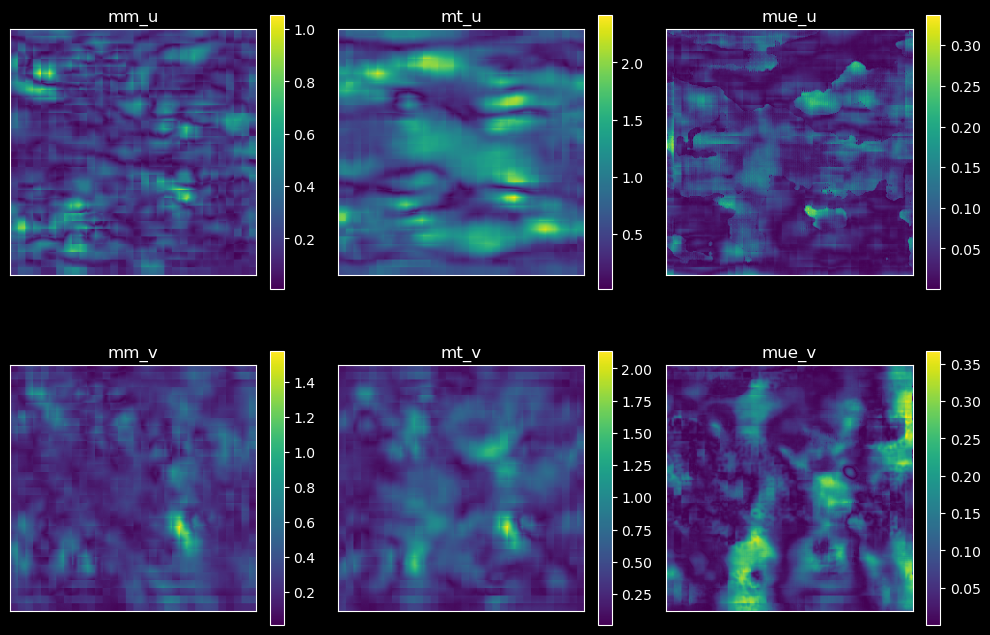

In [161]:
show()

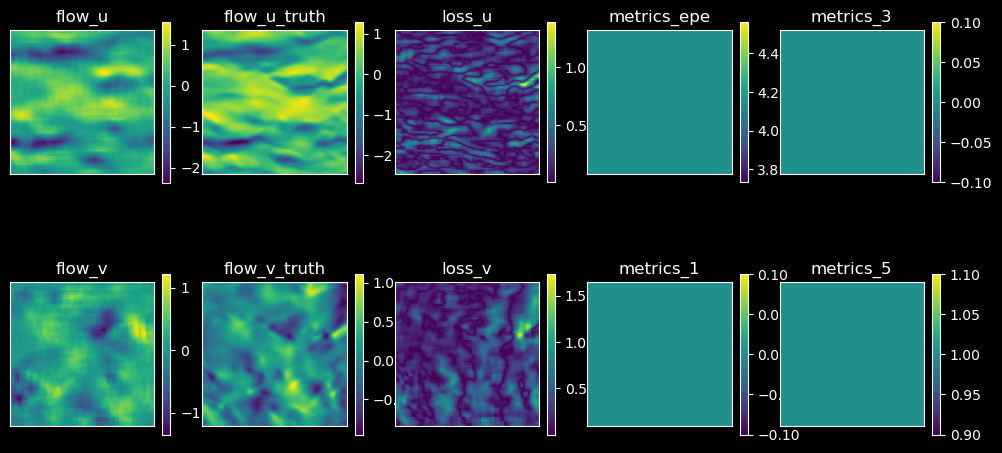

In [162]:
show_truth()